In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv(r'C:\Users\Odafaz\Desktop\Daft Project\daft_listing_final.csv')

Figure(1200x2800) [<Axes: > <Axes: > <Axes: > <Axes: >]


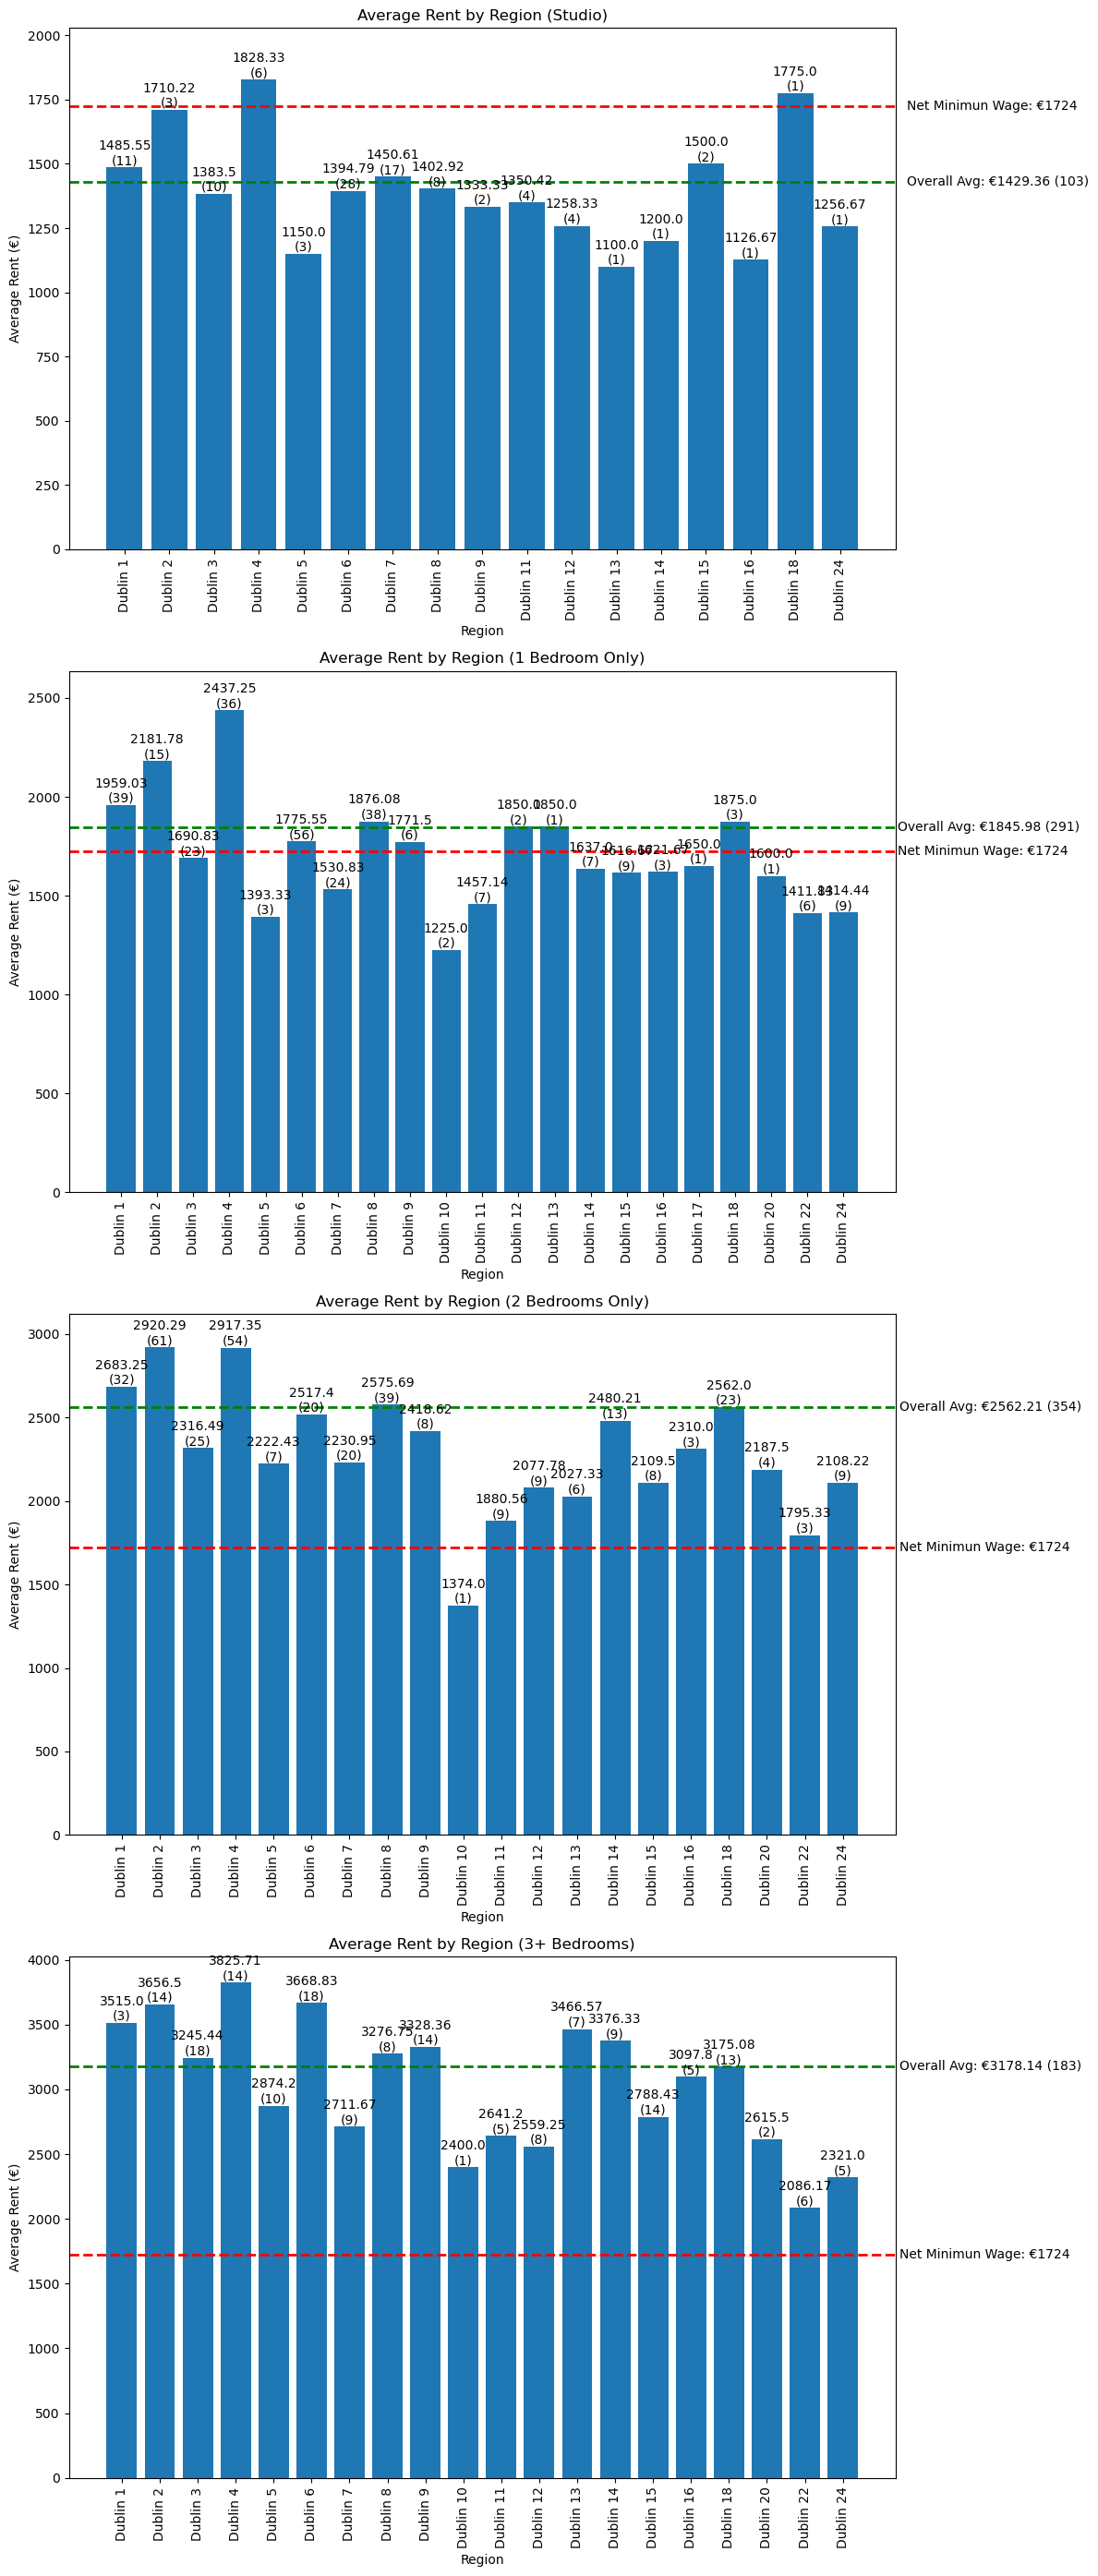

In [3]:
# 2023 Ireland Minimun Wage Net Salary
ireland_min_wage = 1724

# Conditions for bar chart creation
df_filtered_conditions = [(df['type'] == 'Studio') & pd.notna(df['region']),
                         (df['num_bedroom'] == 1) & pd.notna(df['region']),
                         (df['num_bedroom'] == 2) & pd.notna(df['region']),
                         (df['num_bedroom'] >= 3) & pd.notna(df['region'])]

# Define the titles for each graph
graph_titles = ['Studio', '1 Bedroom Only', '2 Bedrooms Only', '3+ Bedrooms']

# Create subplots with len(df_filtered_conditions) rows
fig, axes = plt.subplots(len(df_filtered_conditions), 1, figsize=(12, 7 * len(df_filtered_conditions)))
print(fig,axes)

for i, condition in enumerate(df_filtered_conditions):
    
    df_filtered = df[condition]
    
    # Average rent by region
    df_average_rent_by_region = df_filtered.groupby('region')['rent'].mean().reset_index()
    # Count number of records by region
    df_count_by_region = df_filtered.groupby('region')['rent'].count().reset_index
    
    # Weight per each Region
    df_weights = (df_filtered.groupby('region').size() / len(df_filtered)).reset_index().rename(columns={0: 'weight'})
    # Calculate weighted average rent by region
    weighted_average_rent = (df_average_rent_by_region['rent'] * df_weights['weight']).sum()
    
    # Sort region considering the numeric value after 'Dublin'
    #e.g: from Dublin 1 to Dublin 24    
    df_average_rent_by_region['numeric_region'] = df_average_rent_by_region['region'].str.extract('(\d+)').astype(int)
    df_average_rent_by_region = df_average_rent_by_region.sort_values('numeric_region')
    df_average_rent_by_region = df_average_rent_by_region.reset_index(drop=True)
    
    # Sort region considering the numeric value after 'Dublin'
    #e.g: from Dublin 1 to Dublin 24
    x_axis_sorted = df_average_rent_by_region['region'].astype(str)
    y_axis = df_average_rent_by_region['rent']
    
    # Count of records by region
    df_records_by_region_sorted = df_filtered.groupby('region')['rent'].count().sort_index()
    df_records_by_region_sorted = df_records_by_region_sorted.reindex(x_axis_sorted)
    
    # Plotting the bar chart      
    axes[i].bar(x_axis_sorted, y_axis, width=0.8)
    axes[i].set_xlabel('Region')
    axes[i].set_ylabel('Average Rent (€)')
    axes[i].set_title(f'Average Rent by Region ({graph_titles[i]})')

    for j, (region, rent) in enumerate(zip(x_axis_sorted, y_axis)):
        count = df_records_by_region_sorted[region]
        axes[i].text(j, rent, f'{round(rent, 2)}\n({count})', ha='center', va='bottom')

    # Add average rent and minimum wage lines
    
    axes[i].axhline(weighted_average_rent, color='green', linestyle='--', linewidth=2)
    axes[i].axhline(ireland_min_wage, color='red', linestyle='--', linewidth=2)

    # Add line labels
    axes[i].text(len(x_axis_sorted) + 0.5, weighted_average_rent, f'Overall Avg: €{round(weighted_average_rent, 2)} ({sum(df_records_by_region_sorted)})', va='center')
    axes[i].text(len(x_axis_sorted) + 0.5, ireland_min_wage, f'Net Minimun Wage: €{round(ireland_min_wage, 2)}', va='center')
    
    axes[i].set_xticks(range(len(x_axis_sorted)))
    axes[i].set_xticklabels(x_axis_sorted, rotation=90)

    axes[i].set_ylim(0, max(y_axis) + 200)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()